# **Loading Complete Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

unclean_data=pd.read_csv('complete_dataset_uncleaned_new.csv')
data3=unclean_data.iloc[:,2:]
data3.index=data3.location
data3.pop('date')
data3.pop('location')

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data3)
c=data3.columns
i=data3.index

data2 = pd.DataFrame(scaler.transform(data3))

data2.columns=c
data2.index=i
data2=data2.groupby('location').mean()
data2=data2.iloc[:,:-1]
data2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,,,,,,
Afghanistan,0.000110,0.000450,0.188106,0.019696,0.353820,0.002642,0.009828,0.802514,0.291131,NaN,NaN,0.036232,0.345085
Albania,0.002417,0.002831,0.184590,0.117952,0.551752,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Algeria,0.000148,0.000360,0.177534,0.062370,0.626560,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109
Andorra,0.013005,0.004605,0.174567,0.222609,0.442219,0.007963,NaN,0.046144,0.236290,0.658314,0.427557,0.000000,0.909770
Angola,0.000073,0.000131,0.179183,0.049423,0.632435,0.001156,0.044363,0.304900,0.099865,NaN,NaN,0.000000,0.235136
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.001372,0.002678,NaN,0.225971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.796534
Western Sahara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.507320
Yemen,0.000009,0.000161,0.164171,0.004195,0.335638,0.002598,0.007034,0.644345,0.147596,0.170843,0.305398,0.050725,0.383627


In [ ]:
seed_value= 123

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

In [ ]:
"""j=0
importance=pd.read_csv('importance.csv')
importance=np.array(importance)
for i in importance:
  data2.iloc[:,j]=data2.iloc[:,j]*abs(i)
  j=j+1
data2"""

"j=0\nimportance=pd.read_csv('importance.csv')\nimportance=np.array(importance)\nfor i in importance:\n  data2.iloc[:,j]=data2.iloc[:,j]*abs(i)\n  j=j+1\ndata2"

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
data2=clean_dataset(data2)
temp_df=data2.iloc[:,5:]
temp_df

,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,
Albania,0.005097,0.095827,0.348540,0.307718,0.159453,0.617898,0.209420,0.755602
Algeria,0.000838,0.113977,0.308495,0.194313,0.013667,0.322443,0.137681,0.705109
Argentina,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835
Australia,0.000149,0.378308,0.044060,0.138118,0.293850,0.125000,0.278261,0.901105
Austria,0.005189,0.385084,0.102028,0.181449,0.644647,0.329545,0.534058,0.844338
...,...,...,...,...,...,...,...,...
Vanuatu,0.001096,0.019443,0.723870,0.373392,0.061503,0.380682,0.000000,0.513594
Vietnam,0.014990,0.047393,0.257493,0.169601,0.020501,0.542614,0.188406,0.660890
Yemen,0.002598,0.007034,0.644345,0.147596,0.170843,0.305398,0.050725,0.383627


# **Standardizing Data**

In [ ]:
#data=clean_dataset(data.iloc[:,1:])
#data=pd.DataFrame(scaler.inverse_transform(scaled_data))
#data

In [ ]:
Ind=pd.DataFrame(temp_df[temp_df.index=='Uruguay'])
Ind

,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
location,,,,,,,,
Uruguay,0.000955,0.171062,0.126096,0.201083,0.316629,0.173295,0.202899,0.735883


# Finding Nearest Neighbour of Target Country

In [ ]:
dist=[]
a=Ind
from scipy.spatial import distance
for index,row in temp_df.iterrows():
  row=pd.DataFrame(row)
  dst = distance.euclidean(a, row)
  dist.append(dst)

In [ ]:
dst_target=pd.DataFrame(dist,temp_df.index)
dst_target.columns=['distance']
dst_target

,distance
location,
Albania,0.537900
Algeria,0.394721
Argentina,0.215224
Australia,0.299124
Austria,0.547930
...,...
Vanuatu,0.780186
Vietnam,0.513487
Yemen,0.695914


In [ ]:
dst_target=dst_target.sort_values(by=['distance'])
dst_target

,distance
location,
Uruguay,0.000000
Brazil,0.140195
New Zealand,0.202312
Argentina,0.215224
Portugal,0.238489
...,...
Qatar,0.954878
Timor,0.956858
Papua New Guinea,0.977489


In [ ]:
#X=X.iloc[:,[0,1,3,5,6,7,8,11]]
data = pd.read_csv('complete_dataset_cleaned_new.csv')
data.pop('Pkey')
data.pop('human_development_index')
data.pop('gdp_percentage_weekly')
data=data[data.location!='Romania']
data=data[data.location!='Latvia']
data=data[data.location!='Estonia']
data=data[data.location!='Ireland']
data=data[data.location!='Switzerland']
data=data[data.location!='Malta']

data=data.iloc[:,:-2]
data=data.iloc[:,1:]
data.head()
data

,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Algeria,7/17/2020,13.423,0.113,1.20,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.403
1,Algeria,7/18/2020,13.604,0.249,1.18,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.517
2,Algeria,7/20/2020,13.740,0.204,1.15,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.449
3,Algeria,7/21/2020,13.287,0.294,1.14,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.268
4,Algeria,7/22/2020,13.446,0.249,1.13,0.00,74.07,17.348,13913.839,278.364,6.73,0.7,30.4,1.90,76.88,1.154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23864,United States,4/26/2022,133.965,0.950,1.22,174.23,28.00,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.706
23865,United States,4/27/2022,266.521,2.386,1.21,174.37,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.706
23866,United States,4/28/2022,228.812,1.223,1.21,174.51,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.733
23867,United States,4/29/2022,181.817,1.255,1.20,174.67,27.99,35.608,54225.446,151.089,10.79,19.1,24.6,2.77,78.86,4.822


In [ ]:
temp=data.groupby('location').mean()
available=temp.index
available

Index(['Algeria', 'Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Bulgaria', 'Canada', 'Chile', 'Cyprus', 'Czechia', 'Denmark',
       'Finland', 'France', 'Germany', 'Iceland', 'Israel', 'Italy', 'Japan',
       'Luxembourg', 'Malaysia', 'Netherlands', 'Portugal', 'Serbia',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'United Kingdom', 'United States'],
      dtype='object', name='location')

In [ ]:
dst_target=dst_target.loc[dst_target.index.isin(available)]

In [ ]:
dst_target

,distance
location,
Argentina,0.215224
Portugal,0.238489
Finland,0.240705
Slovenia,0.243056
Canada,0.266898
United Kingdom,0.270390
Denmark,0.281414
Iceland,0.291093
Italy,0.292455


#**Selecting Closest Country**

In [ ]:
c=dst_target.index
n1=c[0]

In [ ]:
n1

'Argentina'

In [ ]:
data1=data[data['location']==n1]
data1.pop('location')
data1.index=data1.date
data1.pop('date')
data1

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
7/1/2020,58.904,0.972,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,12.722
7/2/2020,60.605,0.751,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,13.119
7/3/2020,62.836,1.148,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,13.694
7/4/2020,57.204,0.972,1.18,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,14.069
7/5/2020,53.869,0.574,1.19,0.00,92.59,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,14.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/14/2022,31.539,0.464,0.55,216.53,17.67,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,9.100
4/15/2022,13.097,0.464,0.47,216.55,17.67,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,9.100
4/16/2022,12.170,0.375,0.40,216.60,17.67,16.177,18933.907,191.032,5.5,16.2,27.7,5.0,76.67,9.100


In [ ]:
a=data1.index
b=data1.columns
data1=pd.DataFrame(scaler.transform(data1))
data1.index=a
data1.columns=b
df=data1.iloc[:,[0,1,2,3,4,5,13]]
df=clean_dataset(df)
df

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
7/1/2020,0.001157,0.001755,0.210435,0.000000,0.9259,0.000781,0.070526
7/2/2020,0.001190,0.001356,0.210435,0.000000,0.9259,0.000781,0.072727
7/3/2020,0.001234,0.002073,0.210435,0.000000,0.9259,0.000781,0.075915
7/4/2020,0.001123,0.001755,0.210435,0.000000,0.9259,0.000781,0.077993
7/5/2020,0.001058,0.001036,0.212174,0.000000,0.9259,0.000781,0.080566
...,...,...,...,...,...,...,...
4/14/2022,0.000619,0.000838,0.100870,0.590209,0.1767,0.000781,0.050447
4/15/2022,0.000257,0.000838,0.086957,0.590264,0.1767,0.000781,0.050447
4/16/2022,0.000239,0.000677,0.074783,0.590400,0.1767,0.000781,0.050447


In [ ]:
#data2=unclean_data.iloc[:,3:]
#data2.head()

# **Plot Your Data**

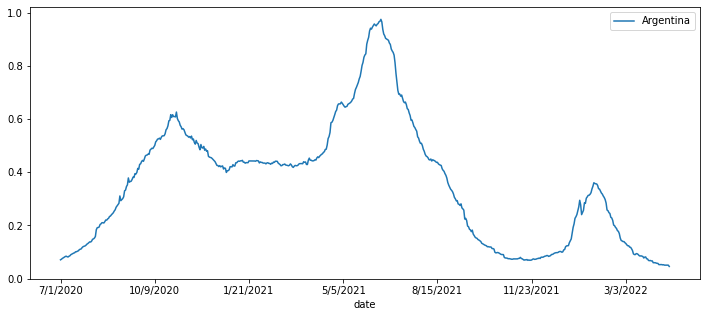

In [ ]:
df.icu_patients_per_million.plot(figsize=(12,5), label=n1)
plt.legend(loc="upper right")


# **Check For Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['icu_patients_per_million'])

1. ADF :  -1.8449546120097335
2. P-Value :  0.3583822396713
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 639
5. Critical Values :
	 1% :  -3.4406250605731623
	 5% :  -2.8660736839408383
	 10% :  -2.5691843911285486


# **Model for country 1**

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#stepwise_fit = auto_arima(df['icu_patients_per_million'],exog=df.iloc[:,0:5], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True, suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df.shape)
train=df.iloc[:-90,:]
test=df.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(647, 7)
(557, 7) (90, 7)


90
0.1934545757507037


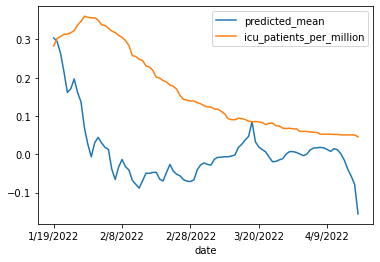

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,2),seasonal_order=(0,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [ ]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,2),seasonal_order=(0,0,1,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.037


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
28/28 [==============================] - 1s 5ms/step - loss: 4.6786e-04
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 4.6843e-04
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 4.6618e-04
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 4.6561e-04
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 4.6488e-04
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 4.6415e-04
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 4.6459e-04
Epoch 8/100
28/28 [==============================] - 0s 9ms/step - loss: 4.6312e-04
Epoch 9/100
28/28 [==============================] - 0s 10ms/step - loss: 4.6219e-04
Epoch 10/100
28/28 [==============================] - 0s 4ms/step - loss: 4.6249e-04
Epoch 11/100
28/28 [==============================] - 0s 3ms/step - loss: 4.6138e-04
Epoch 12/100
28/28 [==============================] - 0s 4ms/step - loss:

3/3 [==============================] - 0s 8ms/step


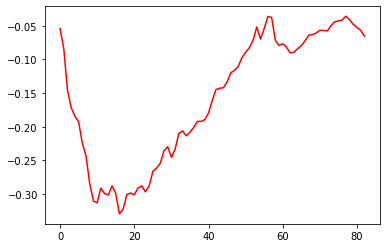

Test MSE: 0.145


In [ ]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

In [ ]:
pred

,0
0,-0.054154
1,-0.083709
2,-0.145697
3,-0.171685
4,-0.184628
...,...
78,-0.041075
79,-0.047974
80,-0.052589
81,-0.056779


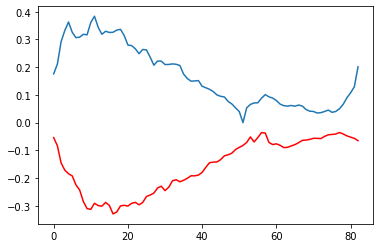

Test MSE: 0.145


In [ ]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.147


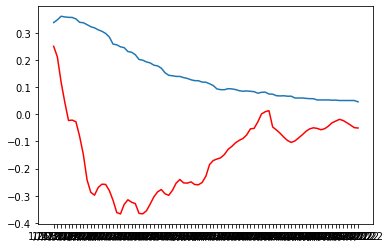

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 1NN**


In [ ]:
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173549,Zimbabwe44677,Africa,Zimbabwe,4/26/2022,4.314,0.063,1.05,63.05,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173550,Zimbabwe44678,Africa,Zimbabwe,4/27/2022,3.877,0.000,1.06,63.10,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173551,Zimbabwe44679,Africa,Zimbabwe,4/28/2022,3.439,0.000,1.08,63.31,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173552,Zimbabwe44680,Africa,Zimbabwe,4/29/2022,3.626,0.000,1.09,63.43,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [ ]:
data4=unclean_data[unclean_data.location=='Uruguay']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')


date
3/13/2020    3/13/2020
3/14/2020    3/14/2020
3/15/2020    3/15/2020
3/16/2020    3/16/2020
3/17/2020    3/17/2020
               ...    
4/26/2022    4/26/2022
4/27/2022    4/27/2022
4/28/2022    4/28/2022
4/29/2022    4/29/2022
4/30/2022    4/30/2022
Name: date, Length: 779, dtype: object

In [ ]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b


In [ ]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]


In [ ]:
df

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/13/2020,0.000023,NaN,NaN,NaN,0.2593,0.000955,NaN
3/14/2020,0.000011,NaN,NaN,NaN,0.4815,0.000955,NaN
3/15/2020,0.000011,NaN,NaN,NaN,0.5185,0.000955,NaN
3/16/2020,0.000120,NaN,NaN,NaN,0.5463,0.000955,NaN
3/17/2020,0.000120,NaN,NaN,NaN,0.5463,0.000955,NaN
...,...,...,...,...,...,...,...
4/26/2022,0.000000,0.000000,0.083478,0.649304,0.1389,0.000955,NaN
4/27/2022,0.000000,0.000000,0.086957,0.649522,0.1389,0.000955,NaN
4/28/2022,0.000000,0.000000,0.088696,0.649849,0.1389,0.000955,NaN


In [ ]:
df=df.iloc[:,:-1]
df=clean_dataset(df)

#Severity
df.iloc[:,1]=df.iloc[:,1]*2
#reproduction rate
#df.iloc[:,2]=df.iloc[:,2]*2

traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

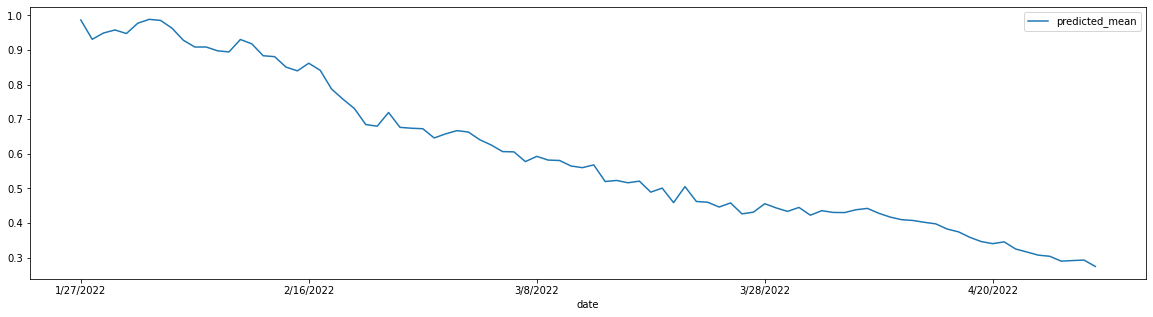

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(2,0,2),seasonal_order=(0,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [ ]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
pred


,predicted_mean
date,
2/3/2022,0.985699
2/4/2022,0.963154
2/5/2022,0.928238
2/6/2022,0.908723
2/7/2022,0.908765
...,...
4/26/2022,0.303771
4/27/2022,0.289678
4/28/2022,0.291365


In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.93154521]
[0.87944444]
[0.7825412]
[0.73703791]
[0.72413702]
[0.70520391]
[0.66991316]
[0.68703909]
[0.63292941]
[0.57292501]
[0.56772892]
[0.55930203]
[0.54017442]
[0.56024227]
[0.55325728]
[0.48813388]
[0.42814561]
[0.40821024]
[0.38366817]
[0.3811807]
[0.41818555]
[0.38507233]
[0.38599551]
[0.37564415]
[0.35770628]
[0.39083371]
[0.40547587]
[0.40846002]
[0.40476631]
[0.39571709]
[0.36080495]
[0.37219156]
[0.36724609]
[0.38625108]
[0.36825068]
[0.37238287]
[0.36362084]
[0.36780832]
[0.37571947]
[0.33048402]
[0.34329097]
[0.35493153]
[0.37615884]
[0.34636133]
[0.35868128]
[0.32530216]
[0.38516923]
[0.34590399]
[0.34953989]
[0.34879542]
[0.36847201]
[0.34383728]
[0.35949886]
[0.40394032]
[0.37368315]
[0.3793507]
[0.40879034]
[0.38495274]
[0.36383475]
[0.35120534]
[0.35338285]
[0.35627784]
[0.35195998]
[0.33871482]
[0.33298671]
[0.32997699]
[0.33481018]
[0.33787359]
[0.33434726]
[0.32183265]
[0.31759132]
[0.30146885]
[0.28857928]
[0.29045996]
[0.30136203]
[0.28203858]
[0.27471603]
[0

In [ ]:
p1=pred_final

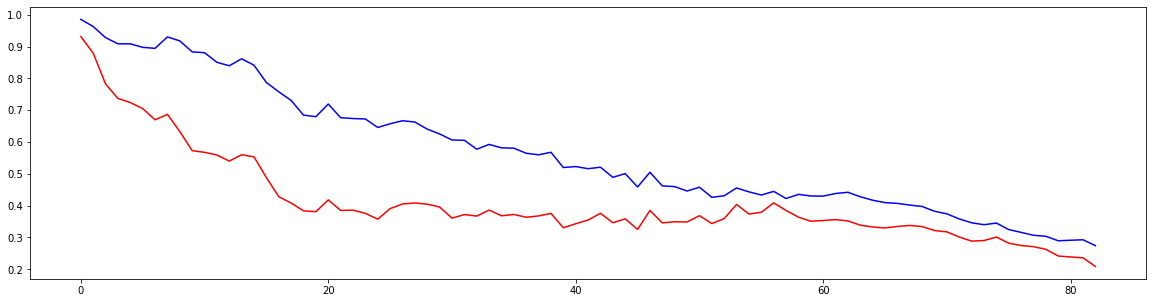

In [ ]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

# **Model for country 2**

In [ ]:
n2=c[1]
n2

'Portugal'

In [ ]:
data5=data[data['location']==n2]
data5.pop('location')
data5.index=data5.date
data5.pop('date')

date
3/14/2020    3/14/2020
3/15/2020    3/15/2020
3/16/2020    3/16/2020
3/17/2020    3/17/2020
3/18/2020    3/18/2020
               ...    
3/29/2022    3/29/2022
4/5/2022      4/5/2022
4/12/2022    4/12/2022
4/19/2022    4/19/2022
4/26/2022    4/26/2022
Name: date, Length: 737, dtype: object

In [ ]:
a=data5.index
b=data5.columns
data5=pd.DataFrame(scaler.transform(data5))
data5.index=a
data5.columns=b
df2=data5.iloc[:,[0,1,2,3,4,5,13]]
df2=clean_dataset(df2)
df2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/14/2020,0.000109,0.001031,0.535652,0.0,0.4306,0.005462,0.005388
3/15/2020,0.000145,0.001031,0.532174,0.0,0.5370,0.005462,0.004851
3/16/2020,0.000164,0.001031,0.526957,0.0,0.5556,0.005462,0.009696
3/17/2020,0.000223,0.000175,0.521739,0.0,0.5556,0.005462,0.009158
3/18/2020,0.000000,0.000175,0.514783,0.0,0.6111,0.005462,0.010777
...,...,...,...,...,...,...,...
3/29/2022,0.007616,0.000000,0.166957,0.0,0.1759,0.005462,0.032863
4/5/2022,0.006616,0.009827,0.166957,0.0,0.1759,0.005462,0.032325
4/12/2022,0.007122,0.004036,0.175652,0.0,0.1759,0.005462,0.032325


In [ ]:
#stepwise_fit = auto_arima(df2['icu_patients_per_million'],exog=df2.iloc[:,0:5], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df2.shape)
train=df2.iloc[:-90,:]
test=df2.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(737, 7)
(647, 7) (90, 7)


90
0.09859174468457342


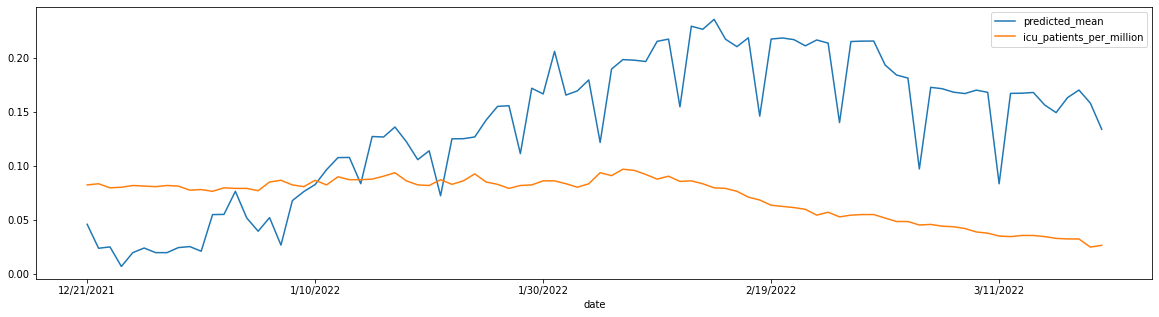

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(0,0,1),seasonal_order=(1,0,2,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:5],start=start,end=end)
pred.index=df2.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [ ]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(0,0,1),seasonal_order=(1,0,2,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.010


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7378e-04
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3937e-04
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1827e-04
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0291e-04
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9106e-04
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8145e-04
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7268e-04
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6434e-04
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5650e-04
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4923e-04
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4280e-04
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 

3/3 [==============================] - 0s 5ms/step


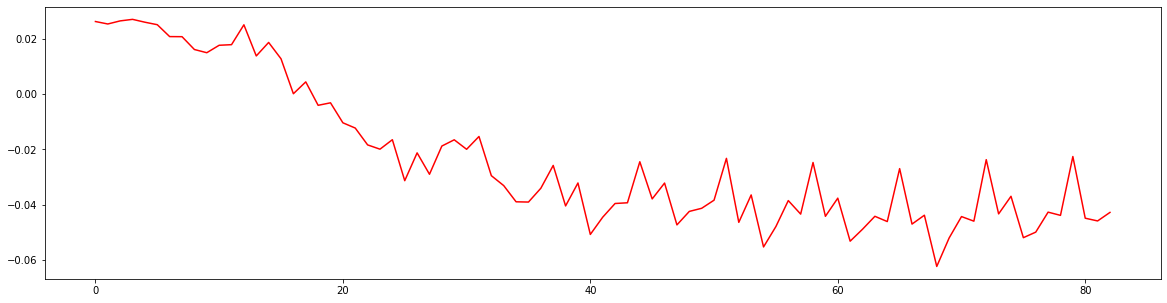

Test MSE: 0.005


In [ ]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

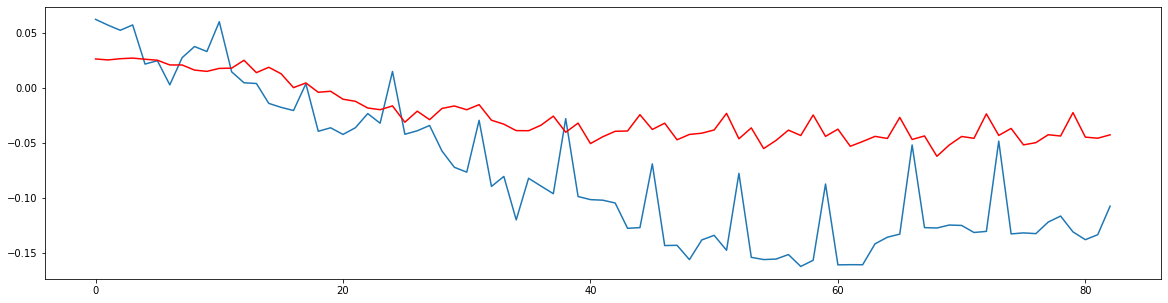

Test MSE: 0.005


In [ ]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.004


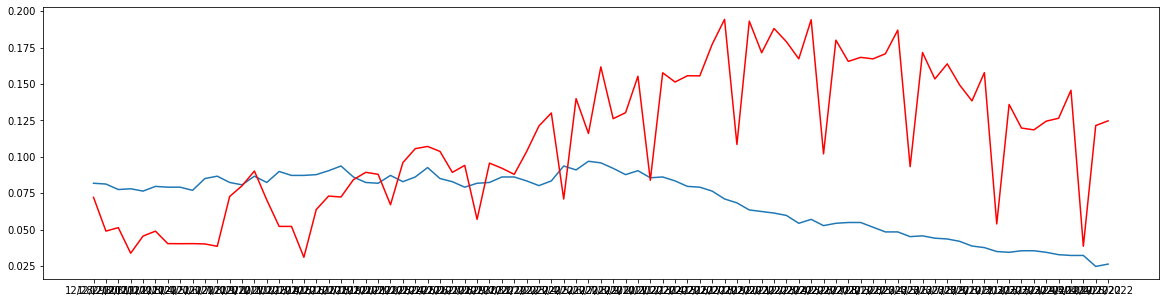

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 2NN**


In [ ]:
unclean_data

,Pkey,continent,location,date,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,Afghanistan43885,Asia,Afghanistan,2/24/2020,0.125,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
1,Afghanistan43886,Asia,Afghanistan,2/25/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
2,Afghanistan43887,Asia,Afghanistan,2/26/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
3,Afghanistan43888,Asia,Afghanistan,2/27/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
4,Afghanistan43889,Asia,Afghanistan,2/28/2020,0.000,NaN,NaN,NaN,8.33,54.422,1803.987,597.029,9.59,NaN,NaN,0.5,64.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173549,Zimbabwe44677,Africa,Zimbabwe,4/26/2022,4.314,0.063,1.05,63.05,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173550,Zimbabwe44678,Africa,Zimbabwe,4/27/2022,3.877,0.000,1.06,63.10,51.01,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173551,Zimbabwe44679,Africa,Zimbabwe,4/28/2022,3.439,0.000,1.08,63.31,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN
173552,Zimbabwe44680,Africa,Zimbabwe,4/29/2022,3.626,0.000,1.09,63.43,51.00,42.729,1899.775,307.846,1.82,1.6,30.7,1.7,61.49,NaN


In [ ]:
data4=unclean_data[unclean_data.location=='Uruguay']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')
data4

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
3/13/2020,1.167,NaN,NaN,NaN,25.93,19.751,20551.409,160.708,6.93,14.0,19.9,2.8,77.91,NaN
3/14/2020,0.584,NaN,NaN,NaN,48.15,19.751,20551.409,160.708,6.93,14.0,19.9,2.8,77.91,NaN
3/15/2020,0.584,NaN,NaN,NaN,51.85,19.751,20551.409,160.708,6.93,14.0,19.9,2.8,77.91,NaN
3/16/2020,6.129,NaN,NaN,NaN,54.63,19.751,20551.409,160.708,6.93,14.0,19.9,2.8,77.91,NaN
3/17/2020,6.129,NaN,NaN,NaN,54.63,19.751,20551.409,160.708,6.93,14.0,19.9,2.8,77.91,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,0.000,0.000,0.45,238.21,13.89,19.751,20551.409,160.708,6.93,14.0,19.9,2.8,77.91,NaN
4/27/2022,0.000,0.000,0.47,238.29,13.89,19.751,20551.409,160.708,6.93,14.0,19.9,2.8,77.91,NaN
4/28/2022,0.000,0.000,0.48,238.41,13.89,19.751,20551.409,160.708,6.93,14.0,19.9,2.8,77.91,NaN


In [ ]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b
data4

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
3/13/2020,0.000023,NaN,NaN,NaN,0.2593,0.000955,0.171062,0.126096,0.201083,0.316629,0.173295,0.202899,0.735883,NaN
3/14/2020,0.000011,NaN,NaN,NaN,0.4815,0.000955,0.171062,0.126096,0.201083,0.316629,0.173295,0.202899,0.735883,NaN
3/15/2020,0.000011,NaN,NaN,NaN,0.5185,0.000955,0.171062,0.126096,0.201083,0.316629,0.173295,0.202899,0.735883,NaN
3/16/2020,0.000120,NaN,NaN,NaN,0.5463,0.000955,0.171062,0.126096,0.201083,0.316629,0.173295,0.202899,0.735883,NaN
3/17/2020,0.000120,NaN,NaN,NaN,0.5463,0.000955,0.171062,0.126096,0.201083,0.316629,0.173295,0.202899,0.735883,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,0.000000,0.000000,0.083478,0.649304,0.1389,0.000955,0.171062,0.126096,0.201083,0.316629,0.173295,0.202899,0.735883,NaN
4/27/2022,0.000000,0.000000,0.086957,0.649522,0.1389,0.000955,0.171062,0.126096,0.201083,0.316629,0.173295,0.202899,0.735883,NaN
4/28/2022,0.000000,0.000000,0.088696,0.649849,0.1389,0.000955,0.171062,0.126096,0.201083,0.316629,0.173295,0.202899,0.735883,NaN


In [ ]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]
df

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/13/2020,0.000023,NaN,NaN,NaN,0.2593,0.000955,NaN
3/14/2020,0.000011,NaN,NaN,NaN,0.4815,0.000955,NaN
3/15/2020,0.000011,NaN,NaN,NaN,0.5185,0.000955,NaN
3/16/2020,0.000120,NaN,NaN,NaN,0.5463,0.000955,NaN
3/17/2020,0.000120,NaN,NaN,NaN,0.5463,0.000955,NaN
...,...,...,...,...,...,...,...
4/26/2022,0.000000,0.000000,0.083478,0.649304,0.1389,0.000955,NaN
4/27/2022,0.000000,0.000000,0.086957,0.649522,0.1389,0.000955,NaN
4/28/2022,0.000000,0.000000,0.088696,0.649849,0.1389,0.000955,NaN


In [ ]:
df=df.iloc[:,:-1]
df=clean_dataset(df)
#Severity
df.iloc[:,1]=df.iloc[:,1]*2

#Reproduction Rate
#df.iloc[:,2]=df.iloc[:,2]*2


In [ ]:
traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

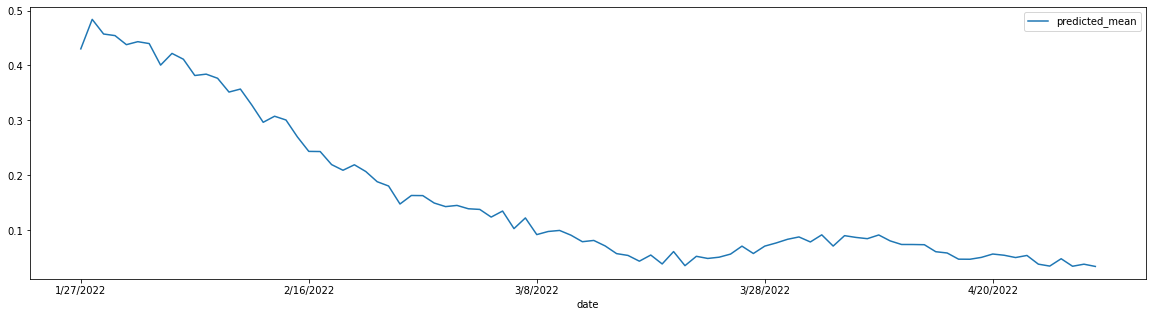

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(0,0,1),seasonal_order=(1,0,2,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [ ]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0     0.026255
1     0.025363
2     0.026480
3     0.027037
4     0.026004
        ...   
78   -0.043805
79   -0.022541
80   -0.044830
81   -0.045821
82   -0.042740
Name: 0, Length: 83, dtype: float32

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.42687737]
[0.44731014]
[0.43780721]
[0.40869922]
[0.41014995]
[0.40170223]
[0.37226992]
[0.37770655]
[0.34397928]
[0.31130988]
[0.32505441]
[0.31838405]
[0.29477144]
[0.25707822]
[0.26168288]
[0.23197922]
[0.20900902]
[0.22327024]
[0.20252987]
[0.1848371]
[0.16976707]
[0.13506811]
[0.14449561]
[0.14272396]
[0.13264314]
[0.11128582]
[0.12350566]
[0.10966779]
[0.11868292]
[0.10695175]
[0.11452587]
[0.08713002]
[0.09245986]
[0.05845354]
[0.0582755]
[0.06008986]
[0.05642715]
[0.05277659]
[0.04045561]
[0.03872408]
[0.00612153]
[0.00905332]
[0.00349964]
[0.01497394]
[0.01353335]
[0.02268465]
[0.00270086]
[0.00466126]
[0.00562857]
[0.00906026]
[0.017662]
[0.04724952]
[0.01069319]
[0.03407339]
[0.02103582]
[0.03511772]
[0.04876742]
[0.03473756]
[0.06637999]
[0.0264584]
[0.05198847]
[0.03322508]
[0.03525266]
[0.04668227]
[0.03397562]
[0.04657343]
[0.02647663]
[0.02930424]
[-0.00197024]
[0.00598419]
[0.0024503]
[0.0006489]
[0.0262582]
[0.0128031]
[0.01692519]
[-0.00221532]
[0.00359384]
[-0.00

In [ ]:
p2=pred_final

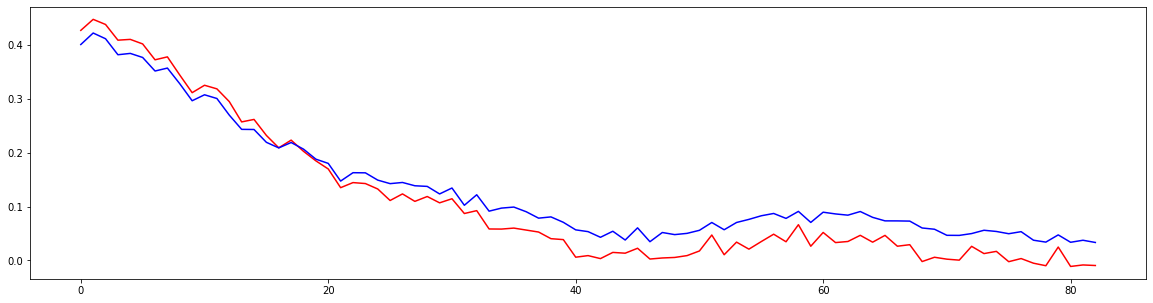

In [ ]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

# **Model for country 3**

In [ ]:
n3=c[2]
n3

'Finland'

In [ ]:
data6=data[data['location']==n3]
data6.pop('location')
data6.index=data6.date
data6.pop('date')
data6

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
3/21/2020,15.715,0.181,1.63,0.00,68.52,18.136,40585.721,153.507,5.76,18.3,22.6,3.28,81.91,0.000
3/25/2020,17.883,0.181,1.45,0.00,68.52,18.136,40585.721,153.507,5.76,18.3,22.6,3.28,81.91,3.974
3/26/2020,18.786,0.903,1.41,0.00,68.52,18.136,40585.721,153.507,5.76,18.3,22.6,3.28,81.91,4.335
3/27/2020,20.412,0.723,1.38,0.00,71.30,18.136,40585.721,153.507,5.76,18.3,22.6,3.28,81.91,5.780
3/28/2020,17.160,0.361,1.37,0.00,71.30,18.136,40585.721,153.507,5.76,18.3,22.6,3.28,81.91,5.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/26/2022,0.000,0.000,0.75,0.00,26.85,18.136,40585.721,153.507,5.76,18.3,22.6,3.28,81.91,4.697
4/27/2022,0.000,0.000,0.78,212.19,26.85,18.136,40585.721,153.507,5.76,18.3,22.6,3.28,81.91,4.335
4/28/2022,4071.718,54.371,0.81,0.00,26.85,18.136,40585.721,153.507,5.76,18.3,22.6,3.28,81.91,4.516


In [ ]:
a=data6.index
b=data6.columns
data6=pd.DataFrame(scaler.transform(data6))
data6.index=a
data6.columns=b
df3=data6.iloc[:,[0,1,2,3,4,5,13]]
df3=clean_dataset(df3)
df3

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,icu_patients_per_million
date,,,,,,,
3/21/2020,0.000309,0.000327,0.288696,0.000000,0.6852,0.000876,0.000000
3/25/2020,0.000351,0.000327,0.257391,0.000000,0.6852,0.000876,0.022030
3/26/2020,0.000369,0.001631,0.250435,0.000000,0.6852,0.000876,0.024032
3/27/2020,0.000401,0.001306,0.245217,0.000000,0.7130,0.000876,0.032042
3/28/2020,0.000337,0.000652,0.243478,0.000000,0.7130,0.000876,0.031044
...,...,...,...,...,...,...,...
4/26/2022,0.000000,0.000000,0.135652,0.000000,0.2685,0.000876,0.026038
4/27/2022,0.000000,0.000000,0.140870,0.578379,0.2685,0.000876,0.024032
4/28/2022,0.079955,0.098178,0.146087,0.000000,0.2685,0.000876,0.025035


In [ ]:
#stepwise_fit = auto_arima(df3['icu_patients_per_million'],exog=df3.iloc[:,0:5], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,suppress_warnings=True,information_criterion='aicc', alpha=0.01 )
print(df3.shape)
train=df3.iloc[:-90,:]
test=df3.iloc[-90:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

(593, 7)
(503, 7) (90, 7)


90
0.09497932826578116


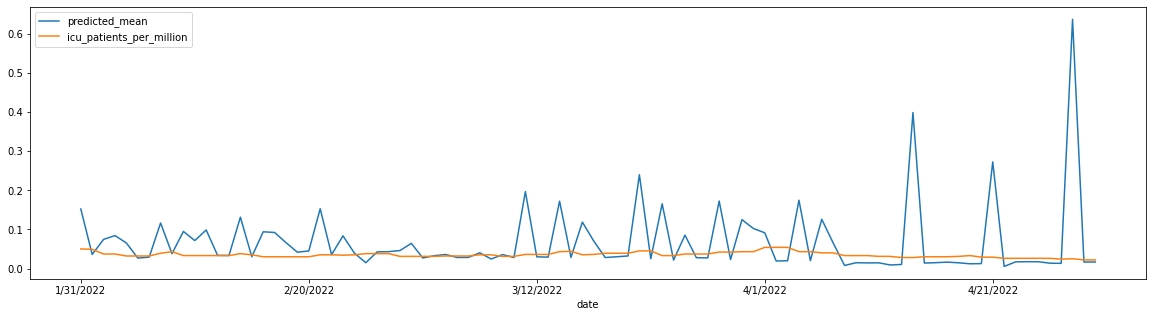

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(1,0,0),seasonal_order=(2,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(train)
end=len(train)+len(test)-1
pred=modela.predict(exog=test.iloc[:,0:5],start=start,end=end)
pred.index=df3.index[start:end+1]
print(len(pred))
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)
test['icu_patients_per_million'].mean()
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [ ]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(1,0,0),seasonal_order=(2,0,1,14))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1]-predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:90,-1], predicted_list[0:90])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

Test MSE: 0.009


##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(50, input_dim=7, activation="tanh"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(25,  activation="relu"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='SGD')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=100, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 5.7620e-05
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 5.7336e-05
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 5.7005e-05
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 5.6841e-05
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 5.6557e-05
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 5.6385e-05
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 5.6170e-05
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 5.5951e-05
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 5.5823e-05
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 5.5659e-05
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 5.5498e-05
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 

3/3 [==============================] - 0s 5ms/step


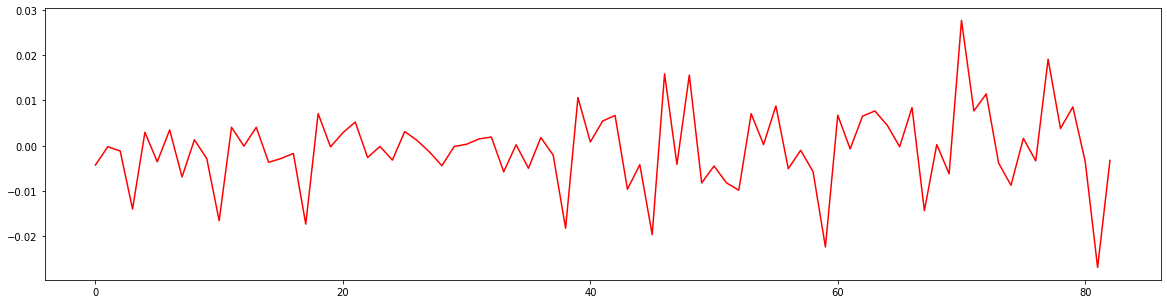

Test MSE: 0.009


In [ ]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

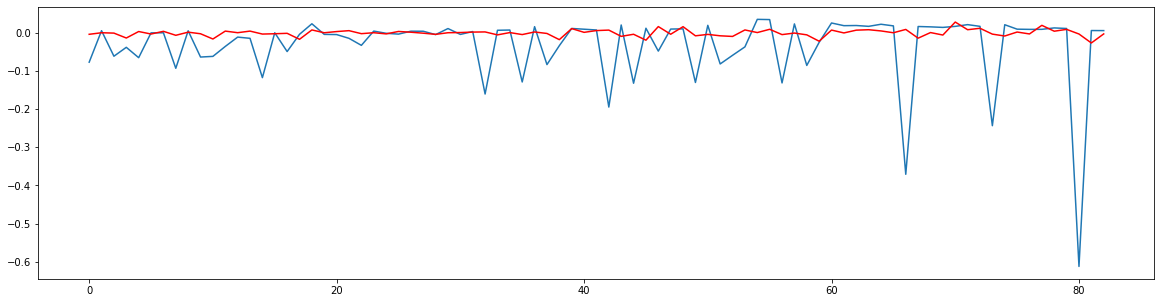

Test MSE: 0.009


In [ ]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann***

Test MSE: 0.005


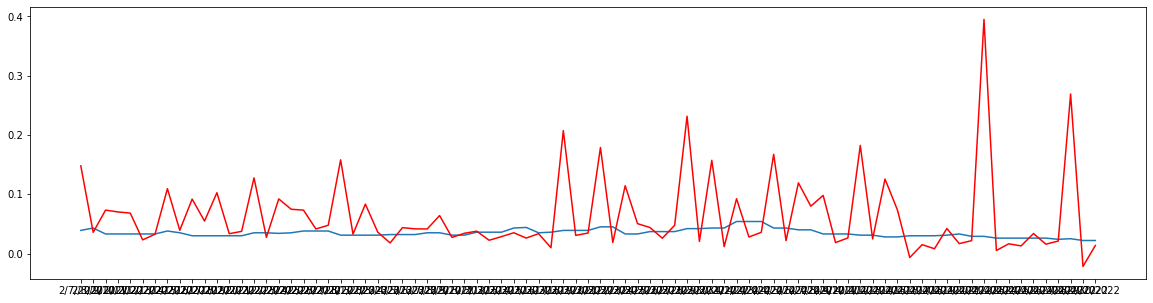

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:83,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

# **Predicting for new country using 3NN**


In [ ]:
data4=unclean_data[unclean_data.location=='Uruguay']
data4.pop('Pkey')
#data4.pop('human_development_index')
#data4.pop('gdp_percentage_weekly')
data4=data4.iloc[:,1:]
data4.pop('location')
data4.index=data4.date
data4.pop('date')


date
3/13/2020    3/13/2020
3/14/2020    3/14/2020
3/15/2020    3/15/2020
3/16/2020    3/16/2020
3/17/2020    3/17/2020
               ...    
4/26/2022    4/26/2022
4/27/2022    4/27/2022
4/28/2022    4/28/2022
4/29/2022    4/29/2022
4/30/2022    4/30/2022
Name: date, Length: 779, dtype: object

In [ ]:
a=data4.index
b=data4.columns
data4=pd.DataFrame(scaler.transform(data4))
data4.index=a
data4.columns=b

In [ ]:
df=data4.iloc[:,[0,1,2,3,4,5,13]]

In [ ]:
df=df.iloc[:,:-1]
df=clean_dataset(df)
#Severity
df.iloc[:,1]=df.iloc[:,1]*2

#Reproduction Rate
#df.iloc[:,2]=df.iloc[:,2]*2


In [ ]:
traini=df.iloc[:-90,:]
testi=df.iloc[-90:,:]

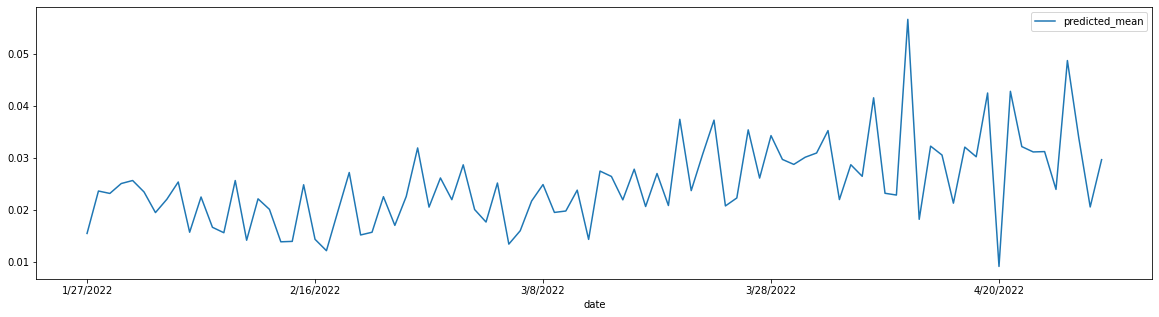

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(1,0,0),seasonal_order=(2,0,1,14) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [ ]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


0    -0.004310
1    -0.000259
2    -0.001185
3    -0.014058
4     0.002948
        ...   
78    0.003786
79    0.008573
80   -0.003550
81   -0.027014
82   -0.003279
Name: 0, Length: 83, dtype: float32

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])


#plt.plot(pred_final , color = 'r')
#plt.show()

[0.01776266]
[0.02514199]
[0.01454431]
[0.00845663]
[0.01962933]
[0.01204237]
[0.02915777]
[0.00723154]
[0.02345359]
[0.01723314]
[-0.00275946]
[0.01802855]
[0.02474678]
[0.01842075]
[0.00847224]
[0.01686725]
[0.02547423]
[-0.00220196]
[0.0228236]
[0.02229231]
[0.01989112]
[0.02783451]
[0.02930934]
[0.02037844]
[0.02295864]
[0.02511174]
[0.02984696]
[0.01868871]
[0.0132314]
[0.02500055]
[0.01373953]
[0.01749324]
[0.02363995]
[0.0190961]
[0.0197317]
[0.01478485]
[0.02561735]
[0.01222765]
[0.00918941]
[0.03711414]
[0.02276491]
[0.03330776]
[0.02736426]
[0.01734848]
[0.01664453]
[0.01773155]
[0.0396398]
[0.02655727]
[0.05294275]
[0.01251594]
[0.01779163]
[0.02718424]
[0.01624615]
[0.04140052]
[0.02997553]
[0.03757255]
[0.02504575]
[0.02994094]
[0.02954036]
[-0.00045381]
[0.03546063]
[0.02574546]
[0.04812501]
[0.03090462]
[0.02738513]
[0.05644039]
[0.02665428]
[0.01786096]
[0.03082063]
[0.01506711]
[0.05987533]
[0.03794425]
[0.05397602]
[0.00527291]
[0.03405292]
[0.03381392]
[0.0277877]
[0

In [ ]:
p3=pred_final
pred_final

[array([0.01776266]),
 array([0.02514199]),
 array([0.01454431]),
 array([0.00845663]),
 array([0.01962933]),
 array([0.01204237]),
 array([0.02915777]),
 array([0.00723154]),
 array([0.02345359]),
 array([0.01723314]),
 array([-0.00275946]),
 array([0.01802855]),
 array([0.02474678]),
 array([0.01842075]),
 array([0.00847224]),
 array([0.01686725]),
 array([0.02547423]),
 array([-0.00220196]),
 array([0.0228236]),
 array([0.02229231]),
 array([0.01989112]),
 array([0.02783451]),
 array([0.02930934]),
 array([0.02037844]),
 array([0.02295864]),
 array([0.02511174]),
 array([0.02984696]),
 array([0.01868871]),
 array([0.0132314]),
 array([0.02500055]),
 array([0.01373953]),
 array([0.01749324]),
 array([0.02363995]),
 array([0.0190961]),
 array([0.0197317]),
 array([0.01478485]),
 array([0.02561735]),
 array([0.01222765]),
 array([0.00918941]),
 array([0.03711414]),
 array([0.02276491]),
 array([0.03330776]),
 array([0.02736426]),
 array([0.01734848]),
 array([0.01664453]),
 array([0.01

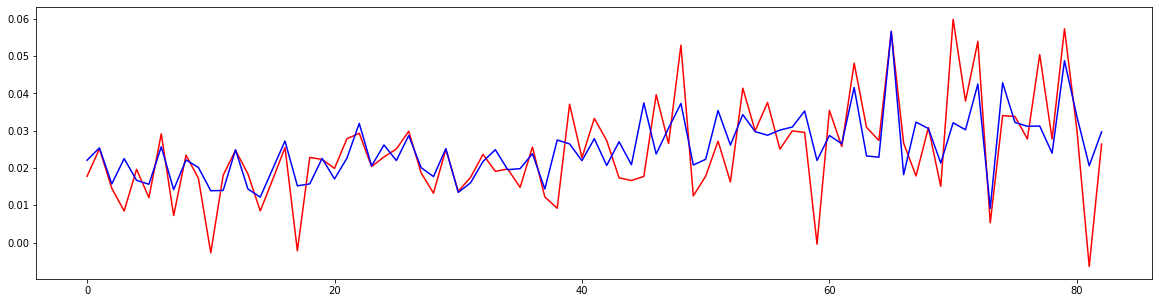

In [ ]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

#**Exporting Results**

In [ ]:
tmp=data1.iloc[-83:,:]

In [ ]:
p1=list(p1)
p2=list(p2)
p3=list(p3)

In [ ]:
tmp

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
date,,,,,,,,,,,,,,
1/26/2022,0.038384,0.012602,0.140870,0.527217,0.2573,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835,0.337319
1/27/2022,0.033711,0.013281,0.133913,0.529343,0.2569,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835,0.347237
1/28/2022,0.027707,0.012163,0.126957,0.531442,0.2565,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835,0.360580
1/29/2022,0.018206,0.007138,0.123478,0.532396,0.2564,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835,0.358014
1/30/2022,0.009355,0.006062,0.118261,0.532968,0.2563,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835,0.356545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/14/2022,0.000619,0.000838,0.100870,0.590209,0.1767,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835,0.050447
4/15/2022,0.000257,0.000838,0.086957,0.590264,0.1767,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835,0.050447
4/16/2022,0.000239,0.000677,0.074783,0.590400,0.1767,0.000781,0.157151,0.173107,0.152674,0.366743,0.284091,0.362319,0.698835,0.050447


In [ ]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p1[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p1=jnk.iloc[:,-1]
p1

0     168.038646
1     158.640344
2     141.160259
3     132.952057
4     130.624905
         ...    
78     47.386825
79     43.600257
80     43.072075
81     42.579929
82     37.700960
Name: 13, Length: 83, dtype: float64

In [ ]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p2[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p2=jnk.iloc[:,-1]
p2

0     77.003128
1     80.688934
2     78.974729
3     73.724027
4     73.985720
        ...    
78    -1.753548
79     4.498430
80    -1.993756
81    -1.494142
82    -1.680356
Name: 13, Length: 83, dtype: float64

In [ ]:
i=0
for row,index in tmp.iterrows():
  tmp.iloc[i,13]=p3[i]
  i=i+1
jnk=pd.DataFrame(scaler.inverse_transform(tmp))
p3=jnk.iloc[:,-1]
p3

0      3.204154
1      4.535288
2      2.623605
3      1.525467
4      3.540876
        ...    
78     5.007492
79    10.344351
80     5.469345
81    -1.157994
82     4.765393
Name: 13, Length: 83, dtype: float64

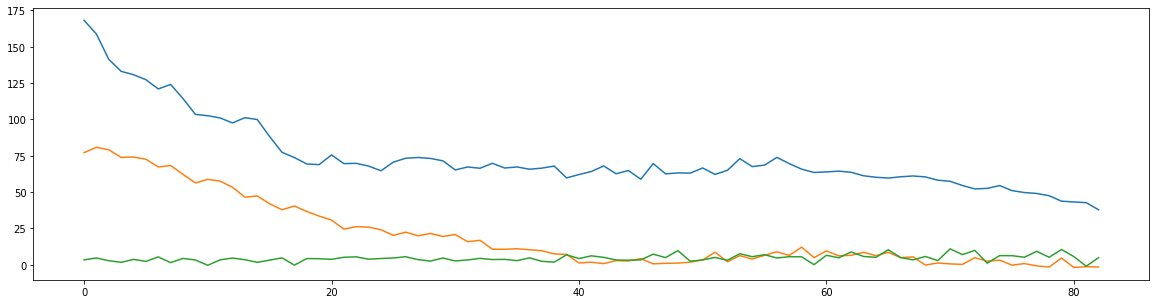

In [ ]:
plt.plot(p1)
plt.plot(p2)
plt.plot(p3)
plt.show()

In [ ]:
final={c[0]:p1,c[1]:p2,c[2]:p3}
final=pd.DataFrame(final)
final.to_csv('Output_2023_01_31.csv')